# Housing Price : EDA & Regression Models

## [ Please star/upvote if u like it ]

## CONTENTS:

[ **1 ) Importing the Modules and Loading the Dataset**](#content1)

[ **2 ) Exploratory Data Analysis (EDA)**](#content2)

[ **3 ) Missing Values Treatment**](#content3)

[ **4 ) Handling Skewness of Features**](#content4)

[ **5 ) Prepare the Data**](#content5)

[ **6 ) Regression Models**](#content6)

[ **7 ) Saving and Making Submission to Kaggle**](#content7)

<a id="content1"></a>
## 1 ) Importing the Modules and Loading the Dataset

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

from scipy import stats
from scipy.stats import norm, skew   # specifically for staistics

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
train=pd.read_csv(r'../input/train.csv')
test=pd.read_csv(r'../input/test.csv')

In [4]:
train.head(10)
#test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

<a id="content2"></a>
## 2 ) Exploratory Data Analysis (EDA)

## 2.1 ) The Features and the 'Target' variable

In [5]:
df=train.copy()
#df.head(10)
df.shape

(1460, 81)

In [6]:
df.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

Dropping the 'Id' columns as the DataFrames are already indexed.

In [7]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.index # the indices of the rows.

RangeIndex(start=0, stop=1460, step=1)

In [9]:
df.columns 

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### For a detailed description of each feature please refer the provided 'data_description.txt ' file. The 'SalePrice' is the target variable which we have to predict.

## 2.2 ) Check for Missing Values

In [10]:
df.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

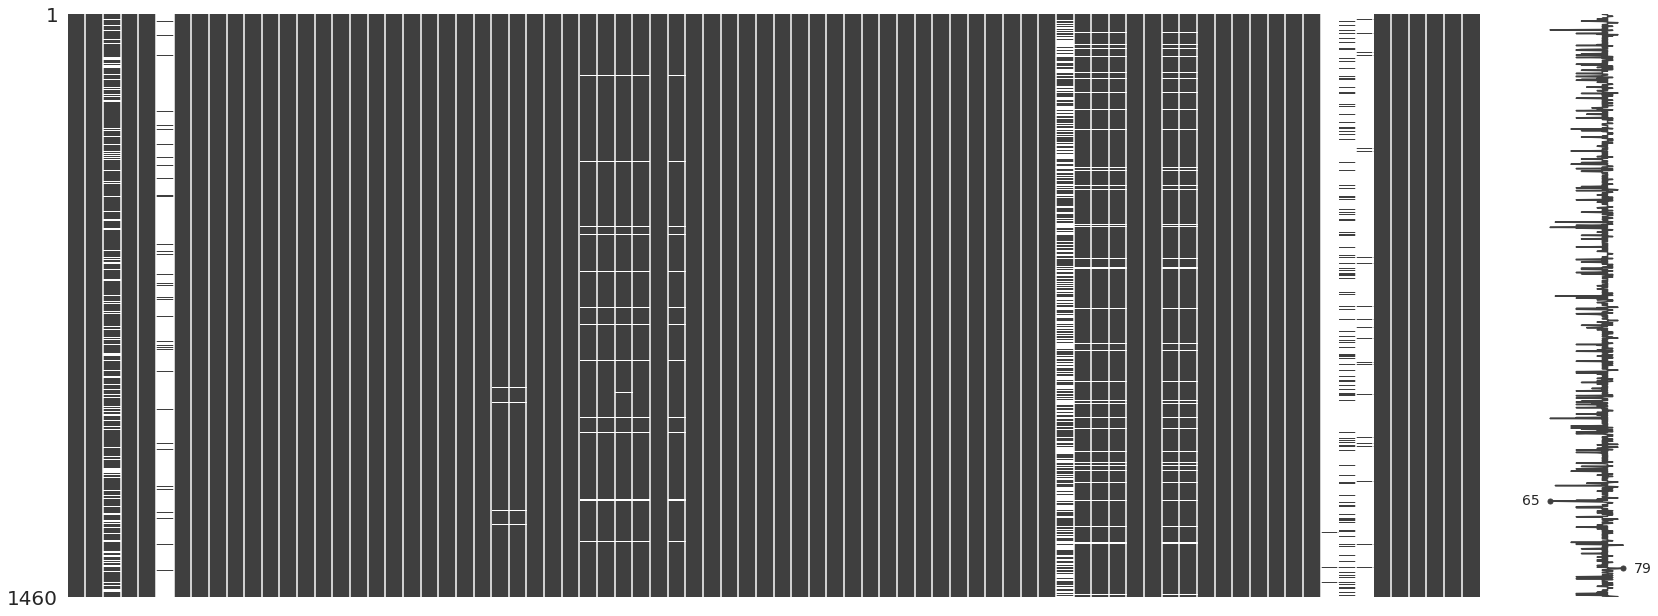

In [11]:
msno.matrix(df) # just to visulaize. 

#### Note many columns have empty or missing values and we shall come to this later or you can refer the 'Missing Values Treatment' section directly.

## 2.3 ) Separate Dataframes

In this section I have just created separate dataframes depending on the datatype of the feature. This may prove useful later when we are considering feature of only one type.

#### CATEGORICAL FEATURES

In [12]:
cat_df=df.select_dtypes(include='object')

In [13]:
cat_df.head(10)
cat_df.shape

(1460, 43)

In [14]:
cat_df.columns   # list of the categorical columns.

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### NUMERIC FEATURES

In [15]:
num_df=df.select_dtypes(include='number')
num_df.shape

(1460, 37)

In [16]:
num_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### FEATURES WITH MISSING VALUES

In [17]:
nan_df=df.loc[:, df.isna().any()]
nan_df.shape
nan_df.columns

# will come back to this later

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

#### MERGING THE TRAIN & TEST SETS

In [18]:
all_data=pd.concat([train,test])

In [19]:
print(all_data.shape)
all_data = all_data.reset_index(drop=True)

(2919, 81)


In [20]:
all_data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,...,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,...,Ex,2Story,1.0,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,...,Ex,1Story,2.0,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,...,Ex,2Story,3.0,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,...,Gd,2Story,4.0,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,...,Ex,2Story,5.0,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,GLQ,Unf,1.0,0.0,Gd,64.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,NaN,0,Wood,1,Typ,480.0,2.0,TA,Unf,TA,Attchd,1993.0,1362,1,...,Ex,1.5Fin,6.0,1,TA,Lvl,Gtl,14115,Inside,85.0,IR1,0,50,RL,0.0,None,Shed,700,10,Mitchel,30,5,5,Y,0,NaN,CompShg,Gable,Normal,143000.0,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,GLQ,Unf,1.0,0.0,Ex,317.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,636.0,2.0,TA,RFn,TA,Attchd,2004.0,1694,0,...,Ex,1Story,7.0,1,Gd,Lvl,Gtl,10084,Inside,75.0,Reg,0,20,RL,186.0,Stone,NaN,0,8,Somerst,57,5,8,Y,0,NaN,CompShg,Gable,Normal,307000.0,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,ALQ,BLQ,1.0,0.0,Gd,216.0,Y,PosN,Norm,SBrkr,228,TA,TA,HdBoard,HdBoard,NaN,TA,2,CBlock,2,Typ,484.0,2.0,TA,RFn,TA,Attchd,1973.0,2090,1,...,Ex,2Story,8.0,1,TA,Lvl,Gtl,10382,Corner,NaN,IR1,0,60,RL,240.0,Stone,Shed,350,11,NWAmes,204,6,7,Y,0,NaN,CompShg,Gable,Normal,200000.0,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,952.0,Y,Artery,Norm,FuseF,205,TA,TA,BrkFace,Wd Shng,NaN,TA,2,BrkTil,2,Min1,468.0,2.0,TA,Unf,Fa,Detchd,1931.0,1774,0,...,Gd,1.5Fin,9.0,2,TA,Lvl,Gtl,6120,Inside,51.0,Reg,0,50,RM,0.0,None,NaN,0,4,OldTown,0,5,7,Y,0,NaN,CompShg,Gable,Abnorml,129900.0,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA

In [21]:
print(all_data.loc[1461:,'SalePrice'])  # note that it is Nan for the values in test set as expected. so we drop it here for now.
all_data.drop(['SalePrice'],axis=1,inplace=True)


1461   NaN
1462   NaN
1463   NaN
1464   NaN
1465   NaN
1466   NaN
1467   NaN
1468   NaN
1469   NaN
1470   NaN
1471   NaN
1472   NaN
1473   NaN
1474   NaN
1475   NaN
1476   NaN
1477   NaN
1478   NaN
1479   NaN
1480   NaN
1481   NaN
1482   NaN
1483   NaN
1484   NaN
1485   NaN
1486   NaN
1487   NaN
1488   NaN
1489   NaN
1490   NaN
        ..
2889   NaN
2890   NaN
2891   NaN
2892   NaN
2893   NaN
2894   NaN
2895   NaN
2896   NaN
2897   NaN
2898   NaN
2899   NaN
2900   NaN
2901   NaN
2902   NaN
2903   NaN
2904   NaN
2905   NaN
2906   NaN
2907   NaN
2908   NaN
2909   NaN
2910   NaN
2911   NaN
2912   NaN
2913   NaN
2914   NaN
2915   NaN
2916   NaN
2917   NaN
2918   NaN
Name: SalePrice, Length: 1458, dtype: float64


In [22]:
all_data.shape

(2919, 80)

## 2.4 ) Analyzing the Target i.e. 'SalePrice'

Text(0.5,1,'Sale Price')

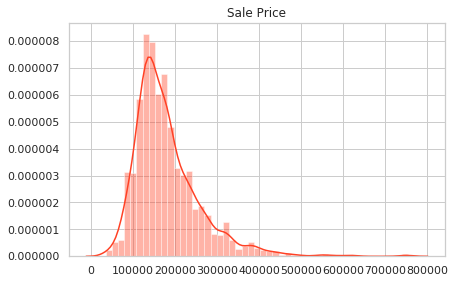

In [23]:
# analyzing the target variable ie 'Saleprice'
sns.distplot(a=df['SalePrice'],color='#ff4125',axlabel=False).set_title('Sale Price')

#### Note that the distribution of the target is quite right skewed. Hence we can take the 'log' transfrom of the target variable. 

#### ALSO LINEAR REGRESSION IS BASED ON THE ASSUMPTION OF THE 'HOMOSCADESITY' AND HENCE TAKING LOG WILL         WILL BE A GOOD IDEA TO ENSURE 'HOMOSCADESITY' (that the varince of errors is constant).

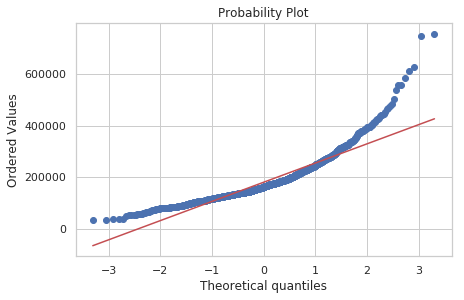

In [24]:
#Get also the qq-plot (the quantile-quantile plot)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

####  TAKING 'Log Transform' OF THE TARGET

In [25]:
df['SalePrice']=np.log1p(df['SalePrice']) 

Text(0.5,1,'log(1+SalePrice)')

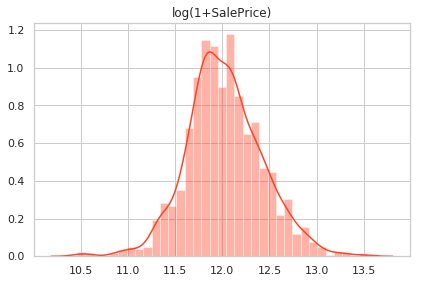

In [26]:
# now gain see the distribution.
sns.distplot(a=df['SalePrice'],color='#ff4125',axlabel=False).set_title('log(1+SalePrice)')  # better.


## 2.5 ) Most Related Features to the Target

In [27]:
cor_mat= df[:].corr()
cor_with_tar=cor_mat.sort_values(['SalePrice'],ascending=False)

In [28]:
print("The most relevant features (numeric) for the target are :")
cor_with_tar.SalePrice

The most relevant features (numeric) for the target are :


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

#### INFERENCES--

1. Note that some of the features have really high corelation with the target. These features are really significant.

2. Of these the features with corelation value >0.5 are really significant. Some features like GrLivArea etc.. are evn more important.

3. We will consider these features (i.e. GrLivArea,OverallQual) etc.. in more detail in subsequent sections.

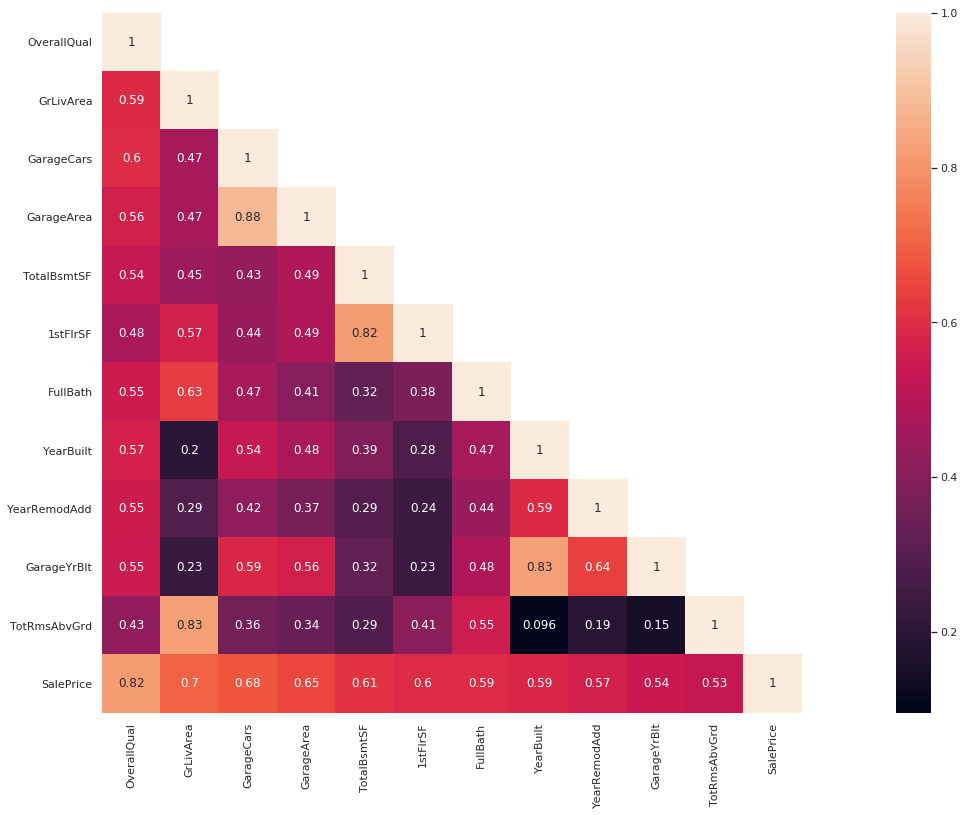

In [29]:
# using a corelation map to visualize features with high corelation.
#corelation matrix.
cor_mat= df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
             'YearBuilt','YearRemodAdd','GarageYrBlt','TotRmsAbvGrd','SalePrice']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

# some inference section.

## 2.6 ) Univariate Analysis

In this section I have performed the univariate analysis; particularly on those features which have very high corelation with the the Target variable as these are quite important.


For the numeric features I have used a 'distplot' and 'boxplot' to analyze the distribution.

Similarly for categorical features the most reasonable way to visualize the distribution is to use a 'countplot' which shows the counts for each category or class.

#### NUMERIC FEATURES

In [30]:
def plot_num(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

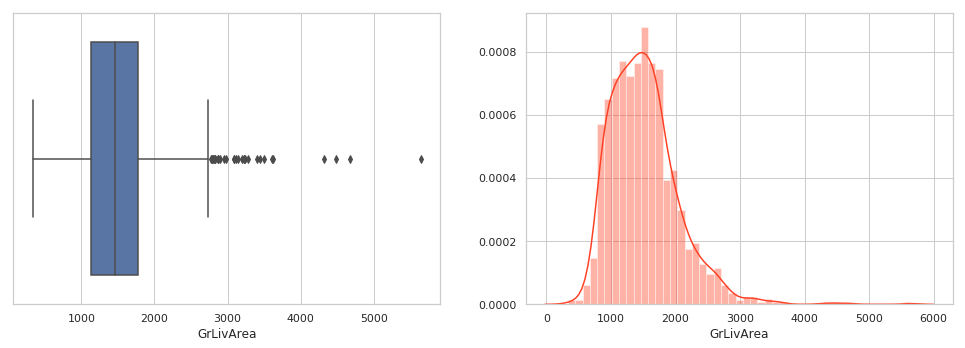

In [31]:
plot_num('GrLivArea')

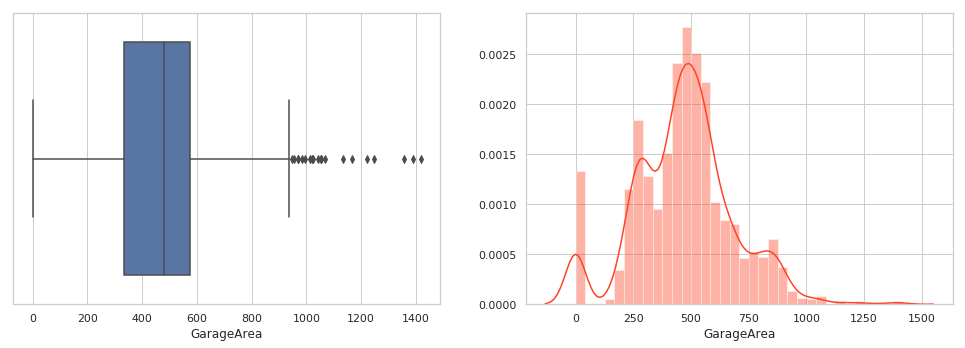

In [32]:
plot_num('GarageArea')

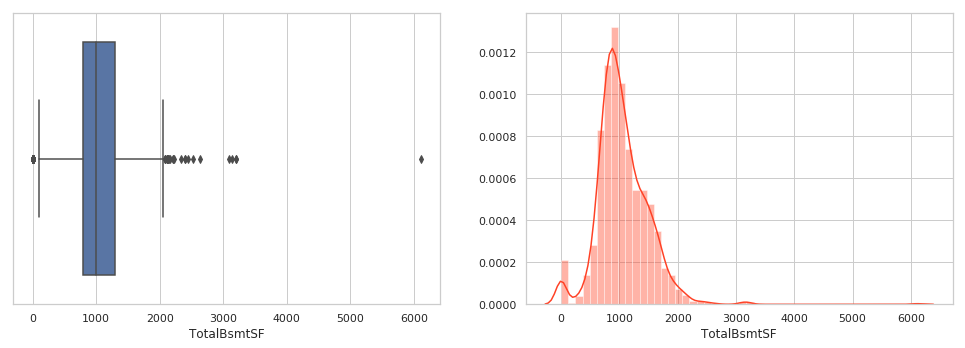

In [33]:
plot_num('TotalBsmtSF') 

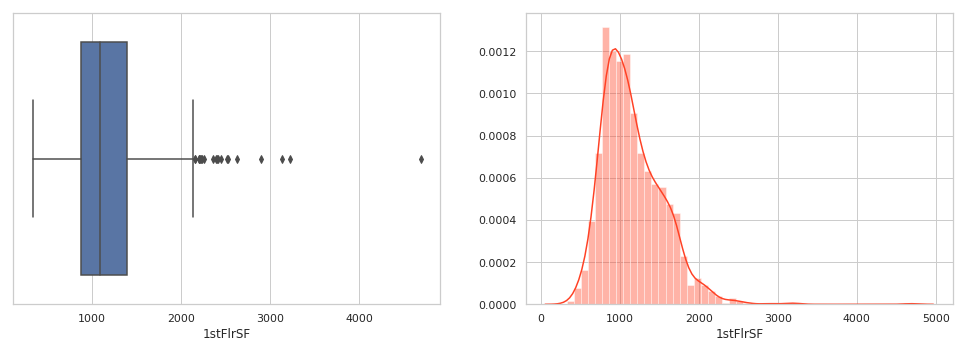

In [34]:
plot_num('1stFlrSF') 

#### Note the features are a bit right skewed. We can therefore take 'log transform' of the features or a BoXCox transformation. 

#### CATEGORICAL FEATURES

In [35]:
def plot_cat(feature):
  sns.countplot(data=df,x=feature)
  ax=sns.countplot(data=df,x=feature)
   

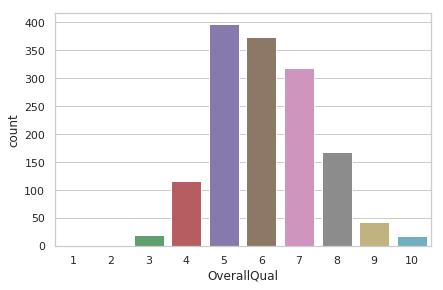

In [36]:
plot_cat('OverallQual')

Most of them are in 'avergae','above avergae' or 'good' categories.

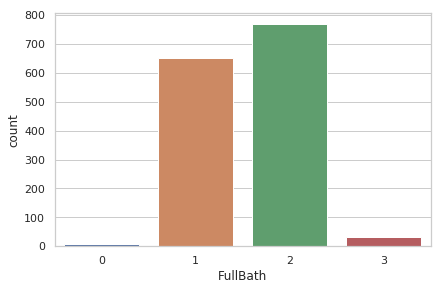

In [37]:
plot_cat('FullBath')

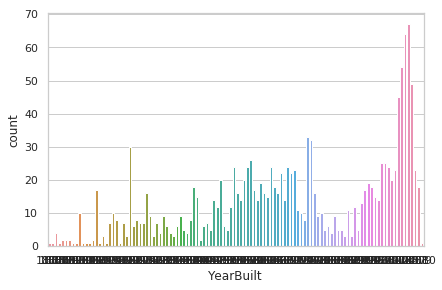

In [38]:
plot_cat('YearBuilt')

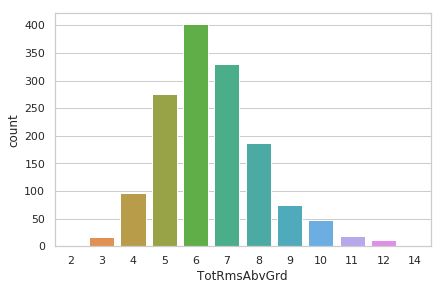

In [39]:
plot_cat('TotRmsAbvGrd') # most of the houses have 5-7 rooms above the grd floor.

#### Lastly we plot the countplot for some important features that are numerical here but are actually categorical and seems if they have been label encoded.

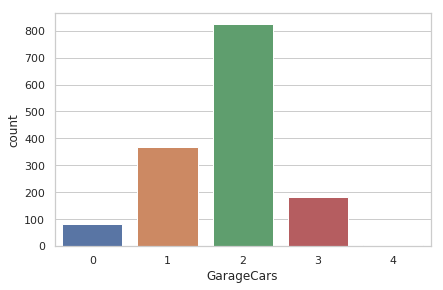

In [40]:
plot_cat('GarageCars')

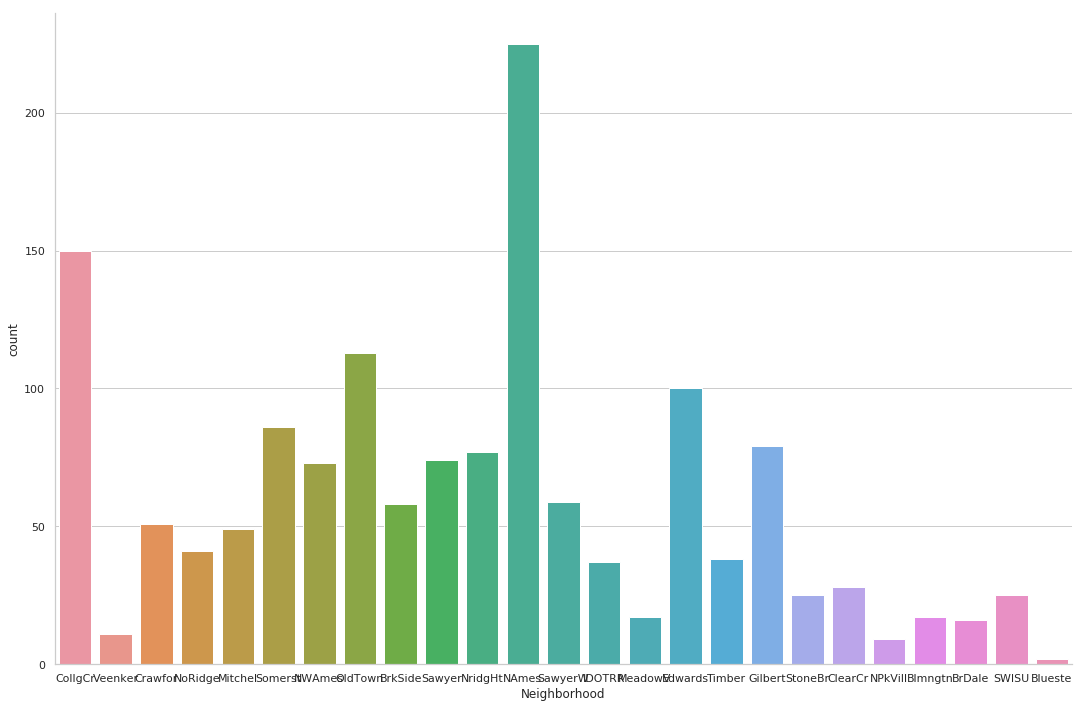

In [41]:
sns.factorplot(data=df,x='Neighborhood',kind='count',size=10,aspect=1.5)

## 2.7 ) Bivariate Analysis

In this section the Bivariate Analysis have been done. I have plotted various numeric as well as categorical features against the target ie 'SalePrice'.

#### NUMERIC FEATURES

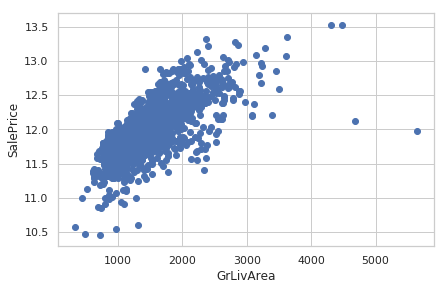

In [42]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

#### Note that there are two outliers on the lower right hand side and can remove them.

In [43]:
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<13)].index) # removing some outliers on lower right side.

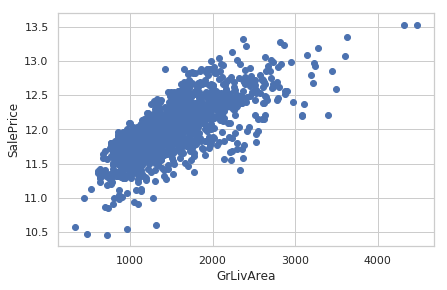

In [44]:
# again checking
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

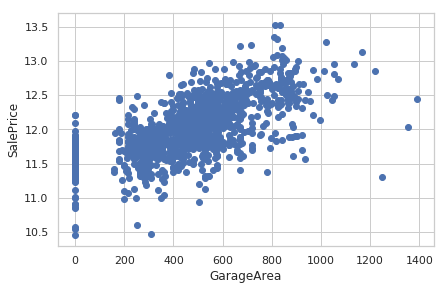

In [45]:
# garage area
fig, ax = plt.subplots()
ax.scatter(x =(df['GarageArea']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()
# can try to fremove the points with gargae rea > than 1200.

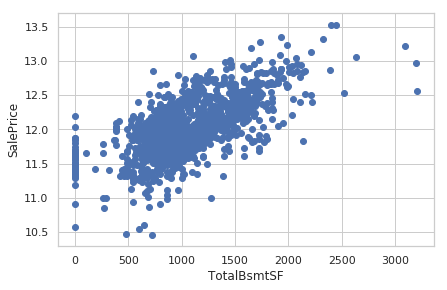

In [46]:
# basment area
fig, ax = plt.subplots()
ax.scatter(x =(df['TotalBsmtSF']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()   # check >3000 can leave here.

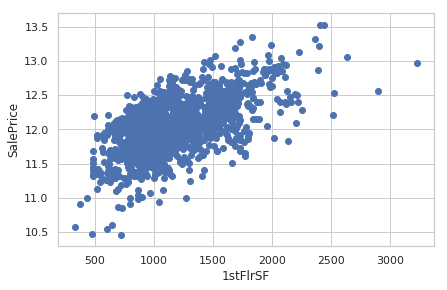

In [47]:
# 1st floor area
fig, ax = plt.subplots()
ax.scatter(x =(df['1stFlrSF']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('1stFlrSF')
plt.show()   

#### CATEGORICAL FEATURES

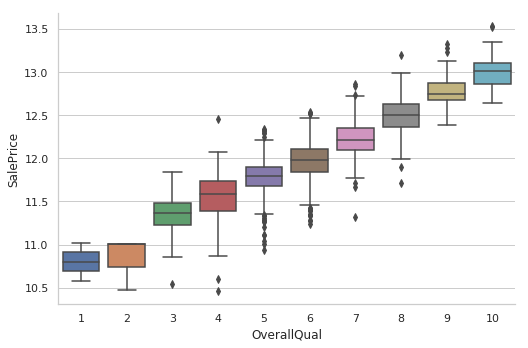

In [48]:
#overall qual
sns.factorplot(data=df,x='OverallQual',y='SalePrice',kind='box',size=5,aspect=1.5)

Clearly as the overall quality increases the sale price also increases which is pretty obvious.

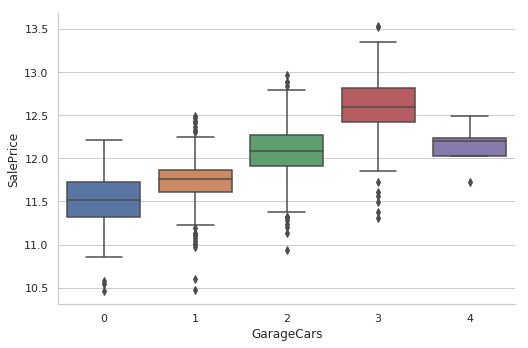

In [49]:
#garage cars
sns.factorplot(data=df,x='GarageCars',y='SalePrice',kind='box',size=5,aspect=1.5)

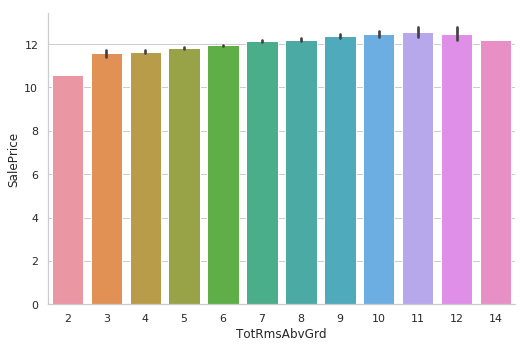

In [50]:
#no of rooms
sns.factorplot(data=df,x='TotRmsAbvGrd',y='SalePrice',kind='bar',size=5,aspect=1.5) # increasing rooms imply increasing SalePrice as expected.

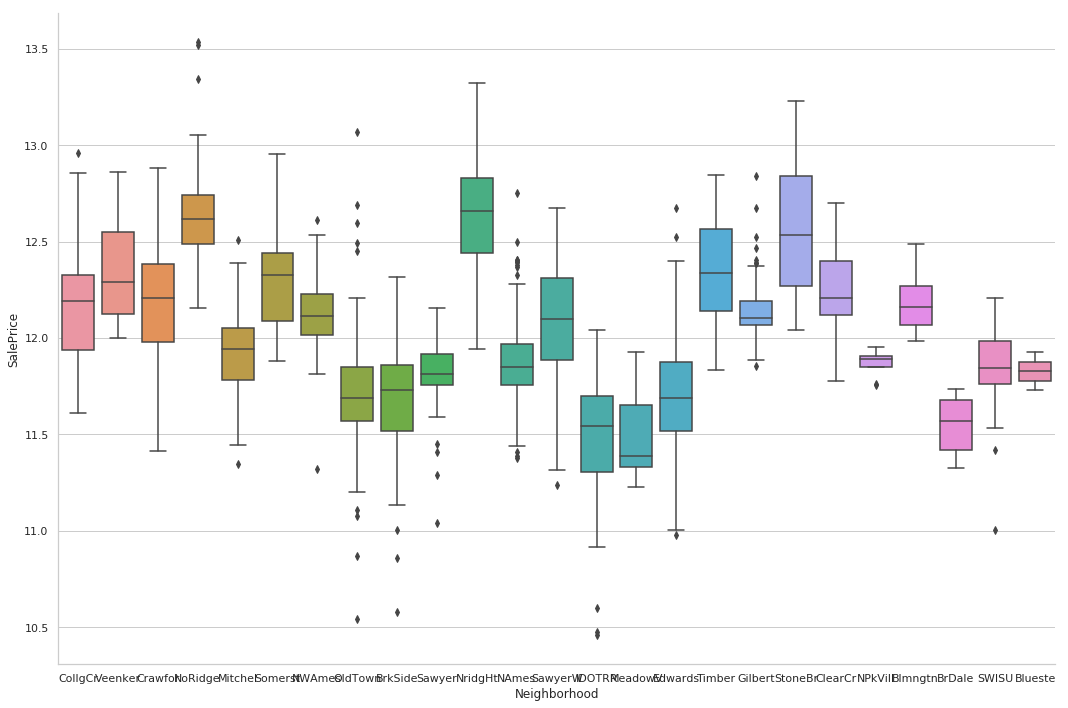

In [51]:
#neighborhood
sns.factorplot(data=df,x='Neighborhood',y='SalePrice',kind='box',size=10,aspect=1.5)

Price varies with neighborhood.More posh areas of the city will have more price.

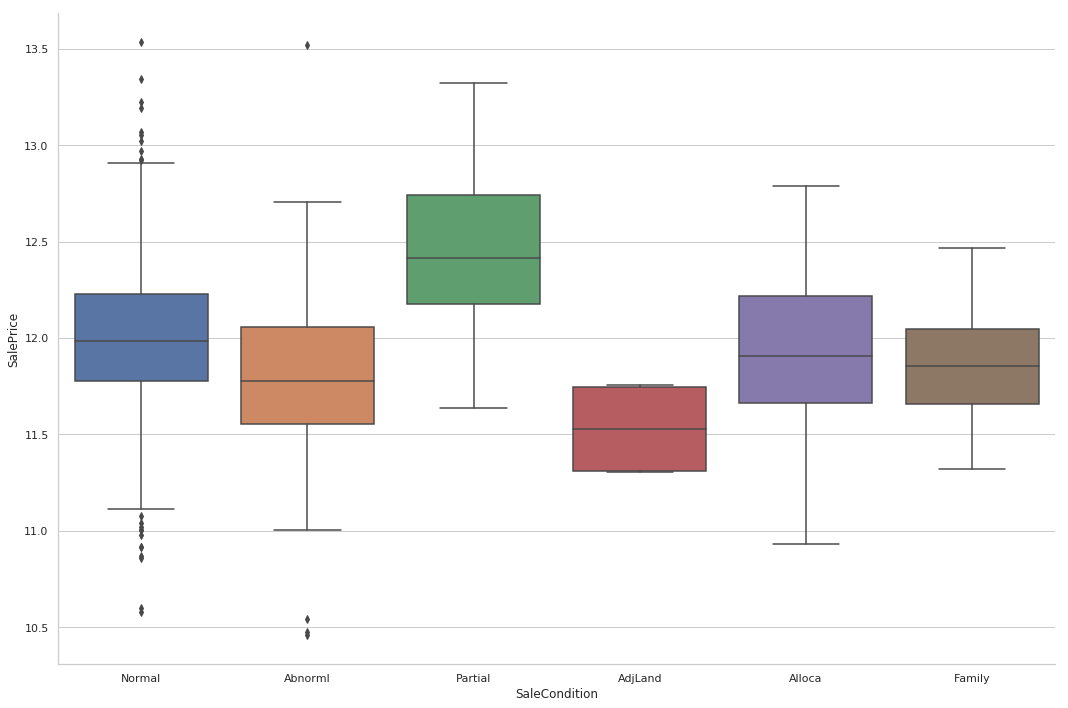

In [52]:
#sale conditioin
sns.factorplot(data=df,x='SaleCondition',y='SalePrice',kind='box',size=10,aspect=1.5)

<a id="content3"></a>
## 3 ) Missing Values Treatment

Here I have handled the missing values in the columns.

Firstly I have droped a couple of columns that have a really high % of missing values.

For other features I have analyzed if it that feaure is important or not and accordingly either have drooped it or imputed the values in it.

For imputation I have considered the meaning of the corressponding feature from the description. Like for a categorical feature if values are missing I have imputed "None" just to mark a separate category meaning absence of that thing. Similarly for a numeric feature I have imputed with 0 in case the missing value implies the 'absence' of that feature.

In all other cases I have imputed the categorical features with 'mode' i.e the most frequent class and with 'mean' for the numeric features.

In [53]:
nan_all_data = (all_data.isnull().sum())
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df


,Missing Ratio
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
Id,1459
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageFinish,159
GarageQual,159


In [54]:
#delet some features withvery high number of missing values.  
all_data.drop(['PoolQC','Alley','Fence','Id','MiscFeature'],axis=1,inplace=True)


In [55]:
test.drop(['PoolQC','Alley','Fence','MiscFeature'],axis=1,inplace=True)
df.drop(['PoolQC','Alley','Fence','MiscFeature'],axis=1,inplace=True)

In [56]:
# FireplaceQu
# it is useful but many of the values nearly half are missing makes no sense to fill half of the values. so deleting this
all_data.drop(['FireplaceQu'],axis=1,inplace=True)
test.drop(['FireplaceQu'],axis=1,inplace=True)
df.drop(['FireplaceQu'],axis=1,inplace=True)


float64
count    1199.000000
mean       69.797331
std        23.203458
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
The corelation of the LotFrontage with the Target :  0.3728996552244501


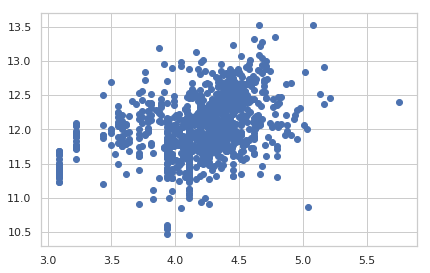

In [57]:
#Lot Frontage
print(df['LotFrontage'].dtype)
plt.scatter(x=np.log1p(df['LotFrontage']),y=df['SalePrice'])
cr=df.corr()
print(df['LotFrontage'].describe())
print("The corelation of the LotFrontage with the Target : " , cr.loc['LotFrontage','SalePrice'])


#### Above analysis shows that there is some relation of lot with teh sale price both by scatter plot and also by the corelation value. therefore instead of deleting I will fill the values with the mean.

In [58]:
all_data['LotFrontage'].fillna(np.mean(all_data['LotFrontage']),inplace=True)
all_data['LotFrontage'].isna().sum()

0

In [59]:
#Garage  related features.
# these features eg like garage qual,cond,finish,type seems to be important and relevant for buying car. 
# hence I will not drop these features insted i will fill them with the 'none' for categorical and 0 for numeric as nan here implies that there is no garage.

all_data['GarageYrBlt'].fillna(0,inplace=True)
print(all_data['GarageYrBlt'].isnull().sum())

all_data['GarageArea'].fillna(0,inplace=True)
print(all_data['GarageArea'].isnull().sum())

all_data['GarageCars'].fillna(0,inplace=True)
print(all_data['GarageCars'].isnull().sum())

all_data['GarageQual'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageQual'].isnull().sum())

all_data['GarageFinish'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageFinish'].isnull().sum())

all_data['GarageCond'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageCond'].isnull().sum())

all_data['GarageType'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageType'].isnull().sum())



0
0
0
0
0
0
0


In [60]:
# basement related features.
#missing values are likely zero for having no basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0,inplace=True)
    
# for categorical features we will create a separate class 'none' as before.

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None',inplace=True)
    
print(all_data['TotalBsmtSF'].isnull().sum())



0


In [61]:
# MasVnrArea 0 and MasVnrType 'None'.
all_data['MasVnrArea'].fillna(0,inplace=True)
print(all_data['MasVnrArea'].isnull().sum())

all_data['MasVnrType'].fillna('None',inplace=True)
print(all_data['MasVnrType'].isnull().sum())

0
0


In [62]:
#MSZoning.
# Here nan does not mean no so I will with the most common one ie the mode.
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0],inplace=True)
print(all_data['MSZoning'].isnull().sum())

0


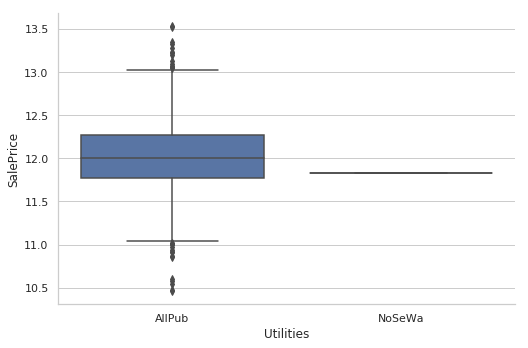

In [63]:
# utilities
sns.factorplot(data=df,kind='box',x='Utilities',y='SalePrice',size=5,aspect=1.5)

#### Note that training set has only 2 of the possible 4 categories (ALLPub and NoSeWa) while test set has other categories. Hence it is of no use to us.

In [64]:
all_data.drop(['Utilities'],axis=1,inplace=True)

In [65]:
#functional
# fill with mode
all_data['Functional'].fillna(all_data['Functional'].mode()[0],inplace=True)
print(all_data['Functional'].isnull().sum())

0


In [66]:
# other rem columns rae all cat like kitchen qual etc.. and so filled with mode.
for col in ['SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']:
  all_data[col].fillna(all_data[col].mode()[0],inplace=True)
  print(all_data[col].isnull().sum())

0
0
0
0
0


#### Lastly checking if any null value still remains.

In [67]:
nan_all_data = (all_data.isnull().sum())
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df



,Missing Ratio


#### Finally no null value remain now;)

In [68]:
all_data.shape

(2919, 73)

<a id="content4"></a>
## 4 ) Handling Skewness

Now I am handling skewness of the features.For this I will take the log transform of the features with skewness > 0.5.

You can also try the BoxCox transformation.

In [69]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.50]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

<a id="content5"></a>
## 5 ) Prepare the Data

## 5.1 ) LabelEncode the Categorical Features

In [70]:
for col in all_data.columns:
    if(all_data[col].dtype == 'object'):
        le=LabelEncoder()
        all_data[col]=le.fit_transform(all_data[col])

## 5.2 ) Splitting into Training and Validation Sets

In [71]:
train=all_data.loc[:(df.shape)[0]+2,:]
test=all_data.loc[(df.shape)[0]+2:,:]

In [72]:
train['SalePrice']=df['SalePrice']
train['SalePrice'].fillna(np.mean(train['SalePrice']),inplace=True)
train.shape
print(train['SalePrice'].isnull().sum())

0


In [73]:
print(train.shape)
print(test.shape)

(1461, 74)
(1459, 73)


In [74]:
x_train,x_test,y_train,y_test=train_test_split(train.drop(['SalePrice'],axis=1),train['SalePrice'],test_size=0.20,random_state=42)

<a id="content6"></a>
## 6 ) Regression Models

Finally it is the time to apply various models and check how are we doing. I have used various regression models from the scikit.

I have also tuned the parameters for some models by using the GridSearchCV module.

#### The evalauton metric that I have used is the Root Mean Squared Error between the 'Log of the actual price' and 'Log of the predicted value' which is also the evaluation metric used by the kaggle.

#### LINEAR REGRESSION

In [75]:
reg_lin=LinearRegression()
reg_lin.fit(x_train,y_train)
pred=reg_lin.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.14280289064075755


#### LASSO (and tuning with GridSearchCV)

In [76]:
reg_lasso=Lasso()
reg_lasso.fit(x_train,y_train)
pred=reg_lasso.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.29575276471198597


In [77]:
params_dict={'alpha':[0.001, 0.005, 0.01,0.05,0.1,0.5,1]}
reg_lasso_CV=GridSearchCV(estimator=Lasso(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
reg_lasso_CV.fit(x_train,y_train)
pred=reg_lasso_CV.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.14218312649039647


**Note the significant decrease in the RMSE on tuning the Lasso Regression.**

In [78]:
reg_lasso_CV.best_params_

{'alpha': 0.001}

#### RIDGE (and tuning with GridSearchCV)

In [79]:
reg_ridge=Ridge()
reg_ridge.fit(x_train,y_train)
pred=reg_ridge.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.14253914858494512


In [80]:
params_dict={'alpha':[0.1, 0.15, 0.20,0.25,0.30,0.35,0.4,0.45,0.50,0.55,0.60]}
reg_ridge_CV=GridSearchCV(estimator=Ridge(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
reg_ridge_CV.fit(x_train,y_train)
pred=reg_ridge_CV.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.1426030196670403


In [81]:
reg_ridge_CV.best_params_

{'alpha': 0.45}

#### GRADIENT BOOSTING

In [89]:
#the params are tuned with grid searchCV.

reg_gb=GradientBoostingRegressor(n_estimators=2000,learning_rate=0.05,max_depth=3,min_samples_split=10,max_features='sqrt',subsample=0.75 ,loss='huber')
reg_gb.fit(x_train,y_train)
pred=reg_gb.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.12302061486951814


#### XGBoost

In [83]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(x_train,y_train)
pred=model_xgb.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.12800012427254118


<a id="content7"></a>
## 7 ) Saving and Making Submission to Kaggle

**Note that the Gradient Boosting gives the best performance on the validation set and so not so strangely i am using it to make predictions to Kaggle (on the test set).**

In [84]:
# predictions on the test set.
 
pred=reg_gb.predict(test)
pred_act=np.exp(pred)
pred_act=pred_act-1
len(pred_act)

1459

In [85]:
test_id=[]
for i in range (1461,2920):
    test_id.append(i)
d={'Id':test_id,'SalePrice':pred_act}
ans_df=pd.DataFrame(d)
ans_df.head(10)

(1459,)


,Id,SalePrice
0,1461,139778.832464
1,1462,168680.476661
2,1463,186770.413820
3,1464,194590.509596
4,1465,190405.768814
5,1466,175849.239313
6,1467,181797.397908
7,1468,170979.920481
8,1469,173493.034044
9,1470,129257.498498


In [86]:
ans_df.to_csv('answer.csv',index=False)

## THE END!!!

## [Please star/ upvote if u like it.]